# Truncated power-law model primary mass distribution (TPL $m_1$ dist.)

This is the truncated power-law (TPL) model introduced in R. Abbott et al. (2023)  
DOI : https://doi.org/10.1103/PhysRevX.13.011048 
By chaing the parameters names m_min, m_max, bins, and alpha, you can generate any mass distribution you want.
The format of TPL model is given by:   
$$
p(m_1|m_{min},m_{max},\alpha) \propto
\begin{cases}
m_1^{-\alpha} & \text{if } m_{min} < m_1 < m_{max} \\
0 & \text{otherwise}
\end{cases}
$$
Parameters :
* m_min : Minimum cutoff of the model
* m_max : Maximum cutoff of the model
* alpha : Spectral index of the model
* bins : Number of bins to generate
when plotting the model, use ._plot_result(color="your preferred color")


In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Truncm1:
    def __init__(self, m_min, m_max, bins, alpha):
        self.m_min = m_min
        self.m_max = m_max
        self.bins = bins
        self.alpha = alpha
        self.m1, self.m1_pdf = self._pdf()

    def _pdf(self):
        m1 = np.linspace(0, 110, self.bins)  # 0에서 110까지의 값으로 m1 생성
        norm_fact = (1 - self.alpha) / (self.m_max**(1 - self.alpha) - self.m_min**(1 - self.alpha))
        m1_pdf = np.where((m1 > self.m_min) & (m1 < self.m_max), norm_fact * m1**(-self.alpha), 0)
        m1_pdf /= np.sum(m1_pdf * (m1[1] - m1[0]))  # 정규화
        return m1, m1_pdf

    def _plot_results(self,color):
        # 일반적인 PDF 플로팅
        plt.plot(self.m1[(self.m1 > self.m_min) & (self.m1 < self.m_max)],
                 self.m1_pdf[(self.m1 > self.m_min) & (self.m1 < self.m_max)],
                 label=rf"$\alpha$={self.alpha}",
                 color=color,linestyle='-')

        # m_min, m_max 근처 점선 구간
        m_min_idx = np.searchsorted(self.m1, self.m_min)  # m_min 근처 인덱스 찾기
        m_max_idx = np.searchsorted(self.m1, self.m_max)  # m_max 근처 인덱스 찾기

        # m_min 근처 점선
        plt.plot(self.m1[m_min_idx-1:m_min_idx+2], self.m1_pdf[m_min_idx-1:m_min_idx+2],
                 color=color, linestyle='--', alpha=0.7, linewidth=1)
        
        # m_max 근처 점선
        plt.plot(self.m1[m_max_idx-1:m_max_idx+2], self.m1_pdf[m_max_idx-1:m_max_idx+2],
                 color=color, linestyle='--', alpha=0.5, linewidth=1)

        # m_min, m_max보다 작은 부분과 큰 부분에 대한 선 그리기
        plt.plot(self.m1[self.m1 < self.m_min],
                 self.m1_pdf[self.m1 < self.m_min],
                 color=color, linestyle='-', alpha=1)

        plt.plot(self.m1[self.m1 > self.m_max],
                 self.m1_pdf[self.m1 > self.m_max],
                 color=color, linestyle='-', alpha=1)

        # 그래프 설정
        plt.xlabel(r"$m_1~[M_\odot]$", fontsize=20)
        plt.ylabel(r"$p(m_1)$", fontsize=20)
        plt.legend()

/var/folders/ch/_k4qgk4x52d72hs7lwplg_lw0000gn/T/ipykernel_60697/333825947.py:15: RuntimeWarning: divide by zero encountered in power
  m1_pdf = np.where((m1 > self.m_min) & (m1 < self.m_max), norm_fact * m1**(-self.alpha), 0)


(array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
        1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 [Text(0, 1e-10, '$\\mathdefault{10^{-10}}$'),
  Text(0, 1e-09, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-08, '$\\mathdefault{10^{-8}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 1e-06, '$\\mathdefault{10^{-6}}$'),
  Text(0, 1e-05, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.0001, '$\\mathdefault{10^{-4}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$')])

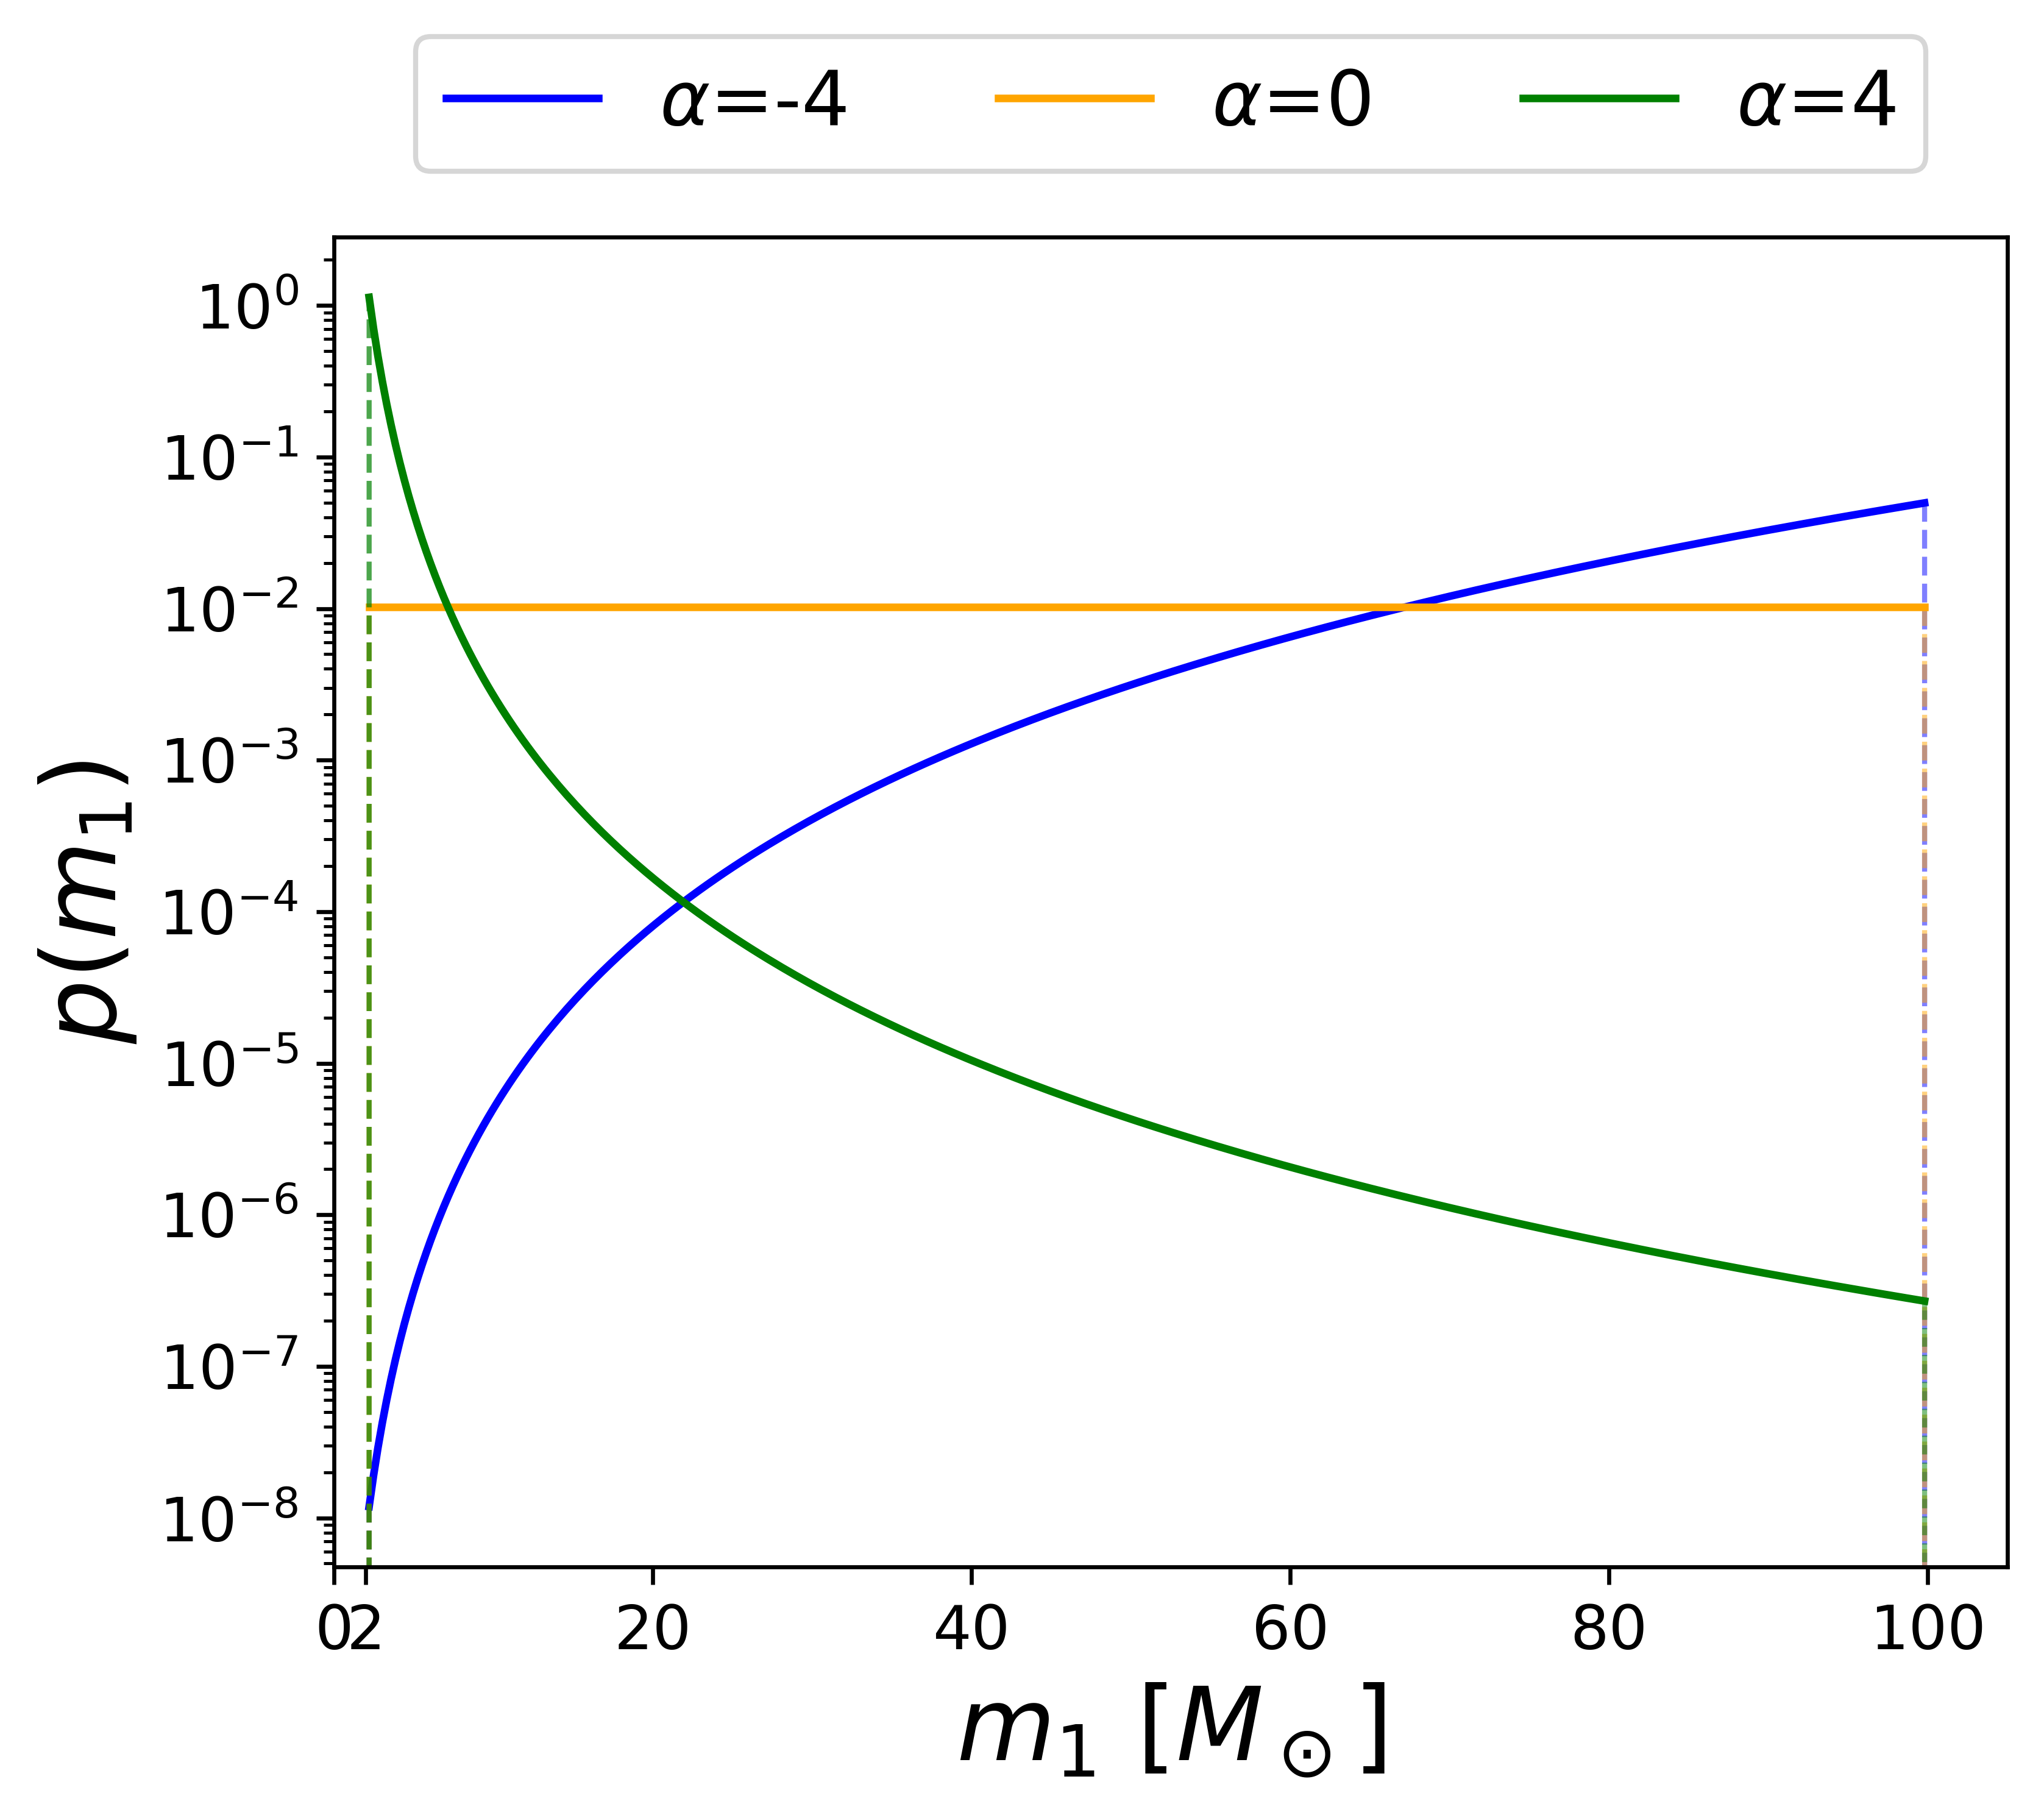

In [15]:
model1=Truncm1(m_min=2,m_max=100,alpha=-4,bins=400)
model2=Truncm1(m_min=2,m_max=100,alpha=0,bins=400)
model3=Truncm1(m_min=2,m_max=100,alpha=4,bins=400)

plt.figure(figsize=(15/2.54,12/2.54),dpi=600)
model1._plot_results(color='blue')
model2._plot_results(color='orange')
model3._plot_results(color='green')
plt.xlim(0,105)
plt.yscale('log')
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.1), fontsize=15, ncol=3)
plt.xticks([0,2,20,40,60,80,100], fontsize=12)
plt.yticks(fontsize=12)

# Truncated power-law model mass ratio distribution (TPL q dist.)

This is the truncated power-law (TPL) model introduced in R. Abbott et al. (2023)  
DOI : https://doi.org/10.1103/PhysRevX.13.011048 
By chaing the parameters names m_min, m_max, bins, and alpha, you can generate any mass distribution you want.
The format of TPL model is given by:   
$$
p(q|m_{min},m_{max},\beta_q) \propto
\begin{cases}
q^{-\beta_q} & \text{if } m_{min} < m_2 < m_1 \\
0 & \text{otherwise}
\end{cases}
$$
Parameters :
* m_min : Minimum cutoff of the model
* m_max : Maximum cutoff of the model
* beta : Spectral index of the model
* bins : Number of bins to generate
when plotting the model, use ._plot_result(color="your preferred color")

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class TruncQ:
    def __init__(self, m_min, m_max, bins, beta):
        self.m_min = m_min
        self.m_max = m_max
        self.bins = bins
        self.mass = np.linspace(self.m_min, self.m_max, self.bins)
        self.beta = beta
        self.q, self.q_pdf, self.q_min, self.q_max = self._pdf()

    def _pdf(self):
        # q_max, q_min 계산
        q_max = self.mass[-2] / self.mass[-1]  # 마지막 두 값으로 q_max 계산
        q_min = self.mass[1] / self.mass[-1]  # 두 번째 값으로 q_min 계산

        # 정규화 상수 C 계산
        norm_fact = (self.beta + 1) / (q_max**(self.beta + 1) - q_min**(self.beta + 1))

        # q 값 설정
        q = np.linspace(0, 1, self.bins)

        # p(q) 계산
        q_pdf = np.where((q > q_min) & (q < q_max), norm_fact * q**self.beta, 0)

        # PDF 정규화
        q_pdf /= np.sum(q_pdf * (q[1] - q[0]))

        return q, q_pdf, q_min, q_max

    def _plot_results(self, color):
        # 일반적인 q 구간에 대한 PDF 플로팅
        plt.plot(self.q[(self.q > self.q_min) & (self.q < self.q_max)],
                 self.q_pdf[(self.q > self.q_min) & (self.q < self.q_max)],
                 label=rf"$\beta_q$={self.beta}",
                 color=color, linestyle='-')

        # q_min 인덱스 근처 점선 플로팅
        q_min_idx = np.searchsorted(self.q, self.q_min)
        plt.plot(self.q[q_min_idx-1:q_min_idx+2], self.q_pdf[q_min_idx-1:q_min_idx+2],
                 color=color, linestyle='--', alpha=0.7, linewidth=1)

        # q_max 인덱스 근처 점선 플로팅
        q_max_idx = np.searchsorted(self.q, self.q_max)
        plt.plot(self.q[q_max_idx-1:q_max_idx+2], self.q_pdf[q_max_idx-1:q_max_idx+2],
                 color=color, linestyle='--', alpha=0.7, linewidth=1)

        # q_min보다 작은 부분 플로팅
        plt.plot(self.q[self.q < self.q_min],
                 self.q_pdf[self.q < self.q_min],
                 color=color, linestyle='-', alpha=1)

        # q_max보다 큰 부분 플로팅
        plt.plot(self.q[self.q > self.q_max],
                 self.q_pdf[self.q > self.q_max],
                 color=color, linestyle='-', alpha=1)

        # 그래프 설정
        plt.xlabel(r"mass ratio, q", fontsize=20)
        plt.ylabel(r"p(q)", fontsize=20)
        plt.legend()


/var/folders/ch/_k4qgk4x52d72hs7lwplg_lw0000gn/T/ipykernel_60697/3087286809.py:25: RuntimeWarning: divide by zero encountered in power
  q_pdf = np.where((q > q_min) & (q < q_max), norm_fact * q**self.beta, 0)


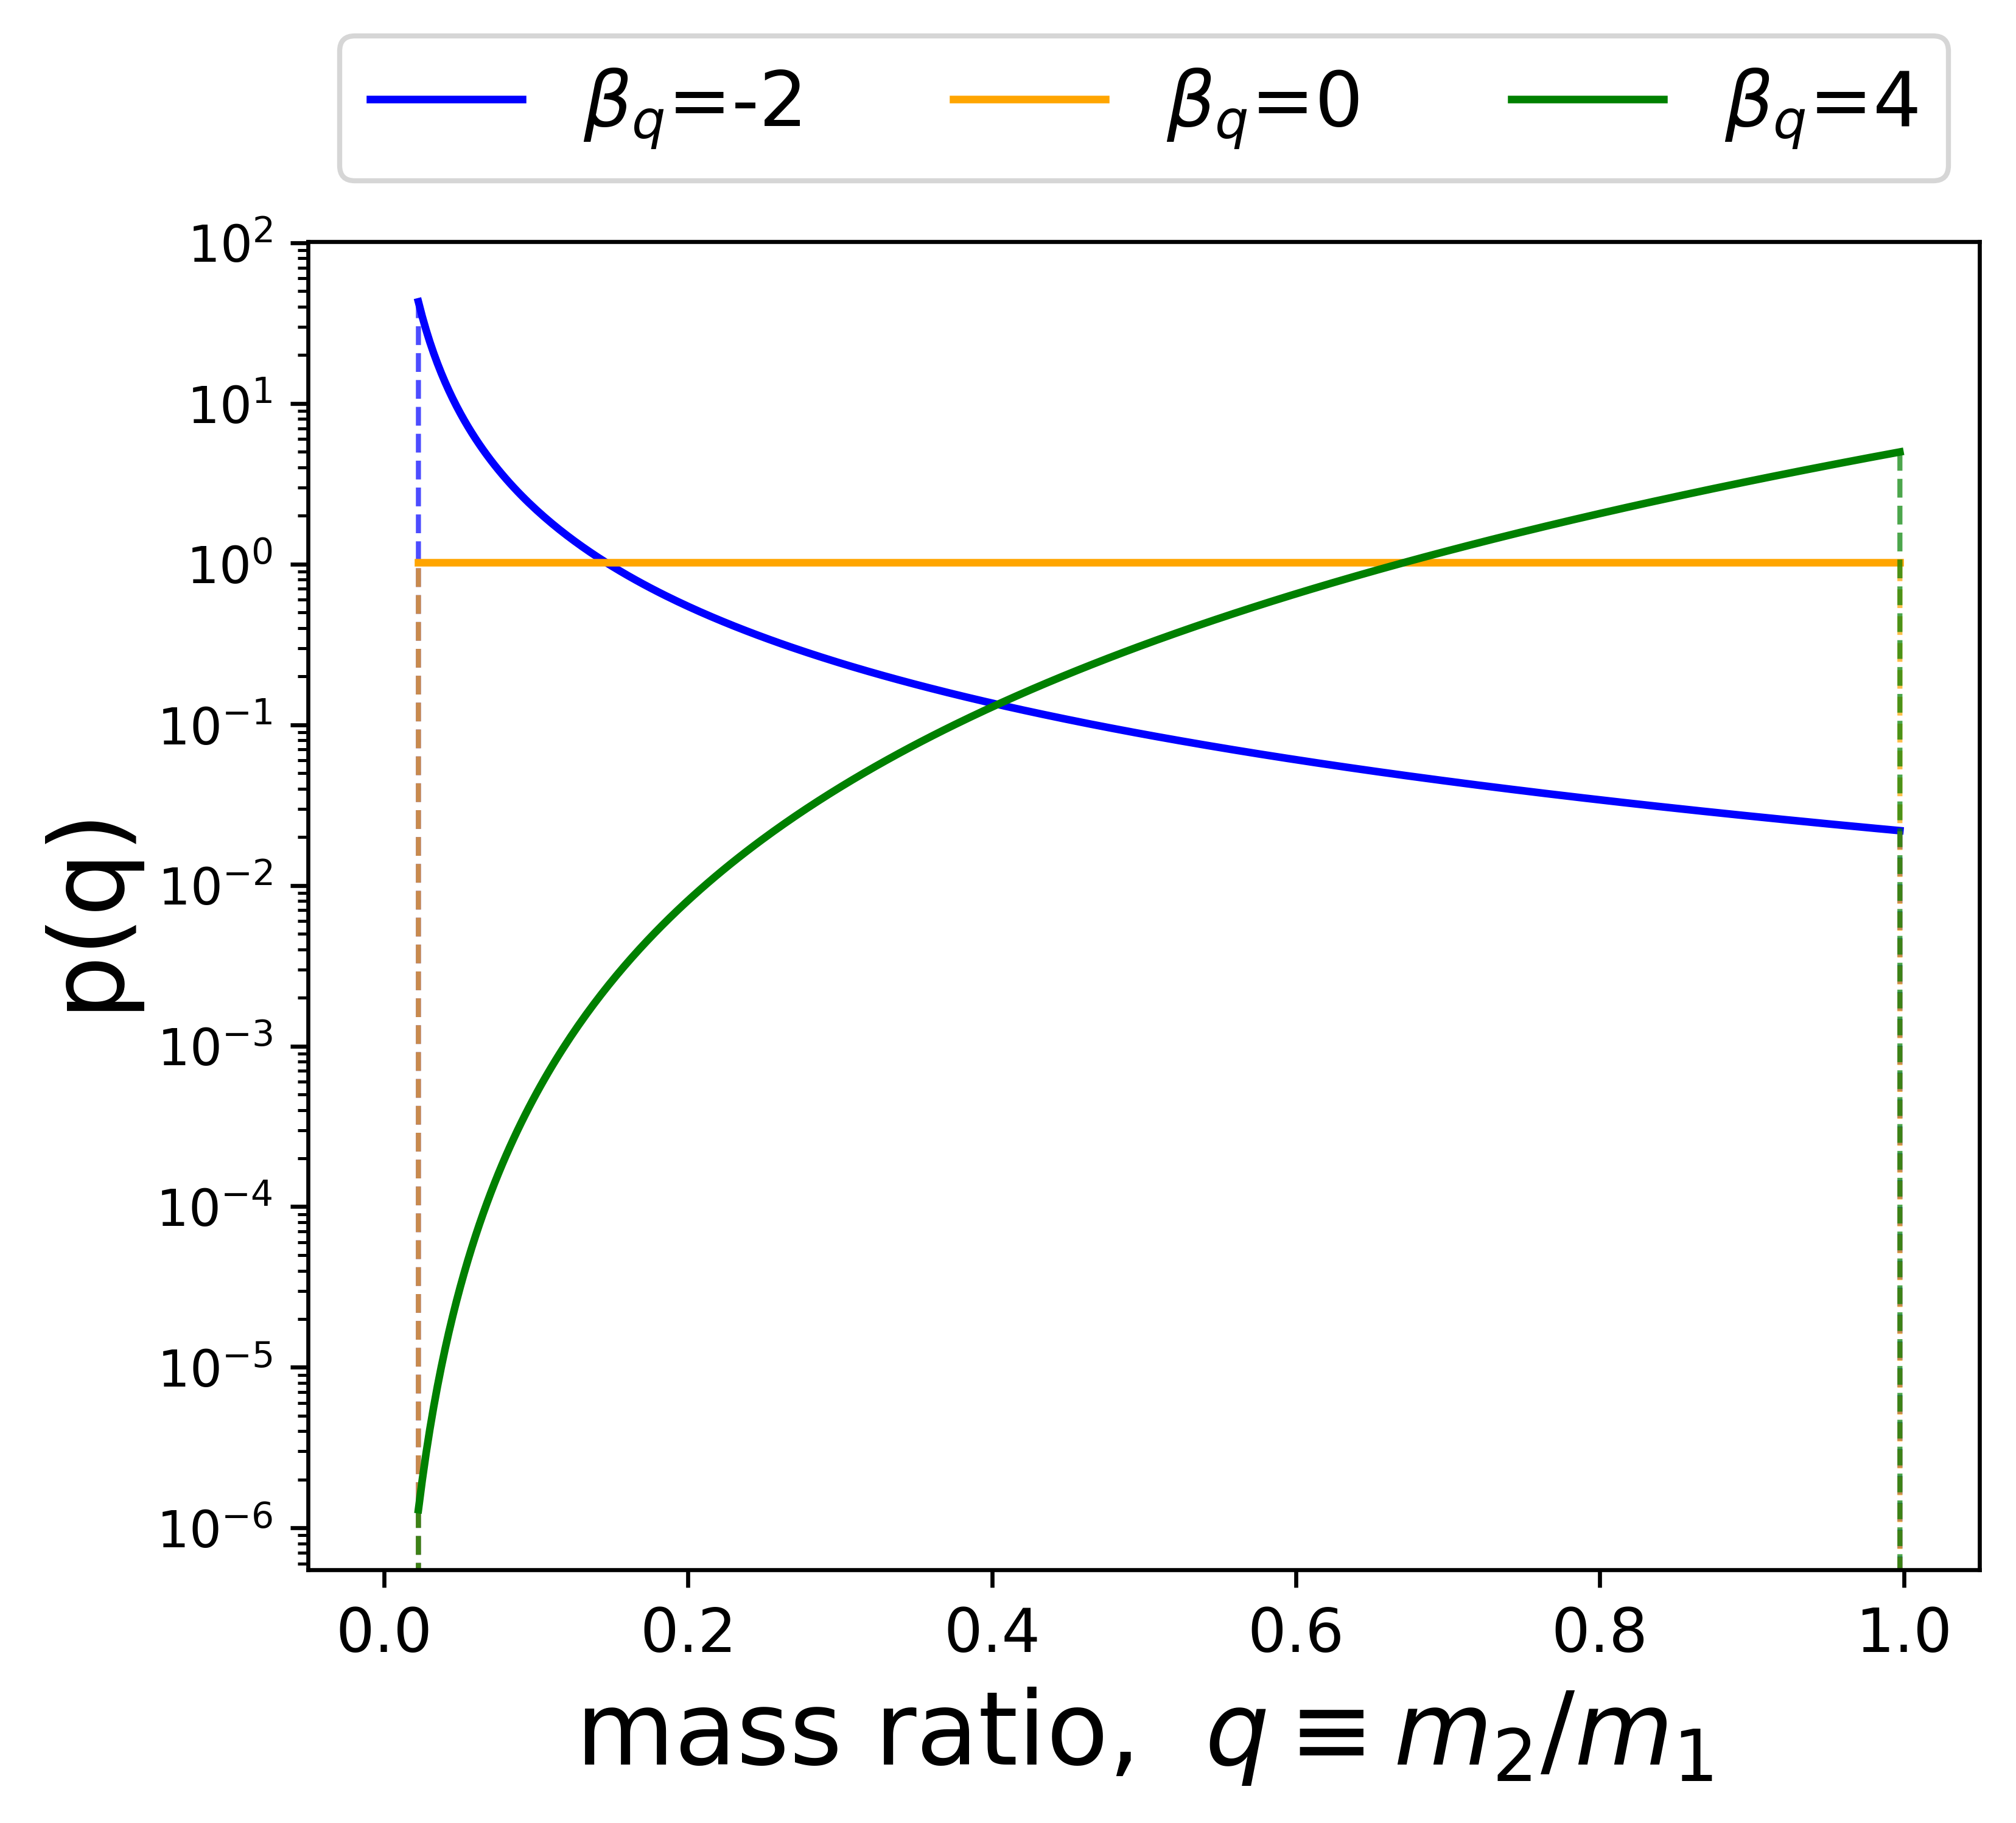

In [24]:
# 모델 인스턴스 생성 및 플로팅
model1 = TruncQ(m_min=2, m_max=100, beta=-2, bins=400)
model2 = TruncQ(m_min=2, m_max=100, beta=0, bins=400)
model3 = TruncQ(m_min=2, m_max=100, beta=4, bins=400)

plt.figure(figsize=(15/2.54,12/2.54),dpi=600)
model1._plot_results(color='blue')
model2._plot_results(color='orange')
model3._plot_results(color='green')
plt.yscale('log')
plt.xlabel(r'mass ratio,  $q\equiv{m_2}/{m_1}$',fontsize=20)
plt.xticks(fontsize=12)
plt.legend(loc='center',bbox_to_anchor=(0.5,1.1),fontsize=15,ncol=3)
#plt.xticks([model1.q_min,0.2,0.4,0.6,0.8,model1.q_max],fontsize=12)
#plt.legend(fontsize=12)
plt.show()